In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *

## 1. Échantillonnage batché

Dans les modèles autoregressifs, les différentes composantes ne sont pas indépendantes. On va être obligé de les échantillonner une par une.

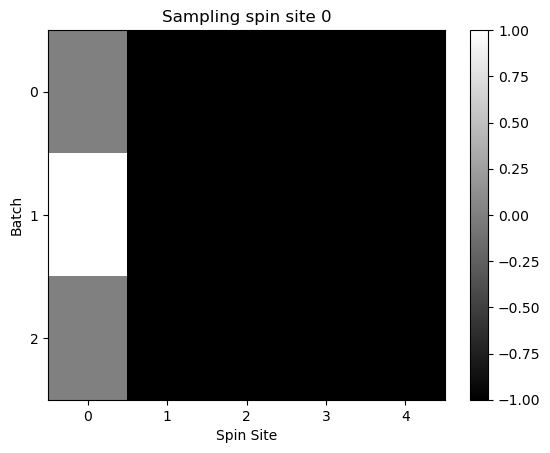

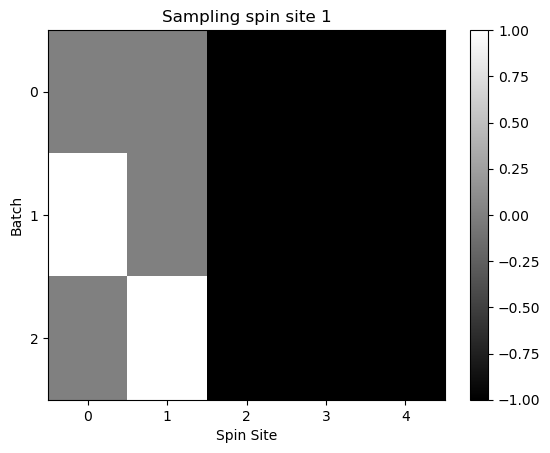

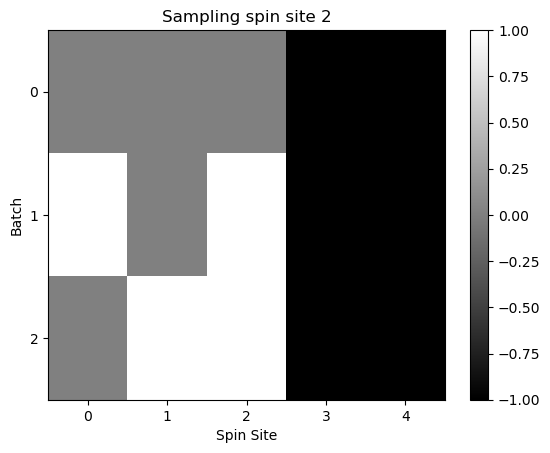

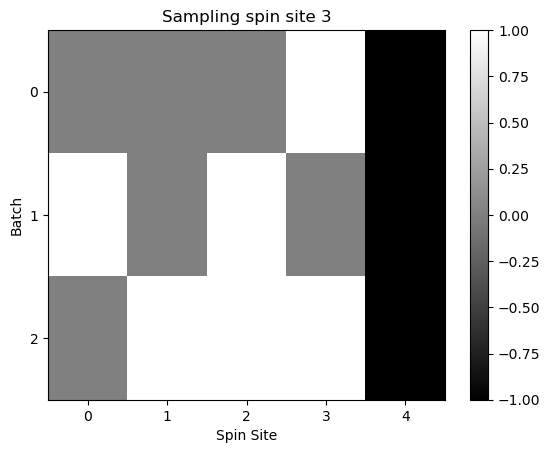

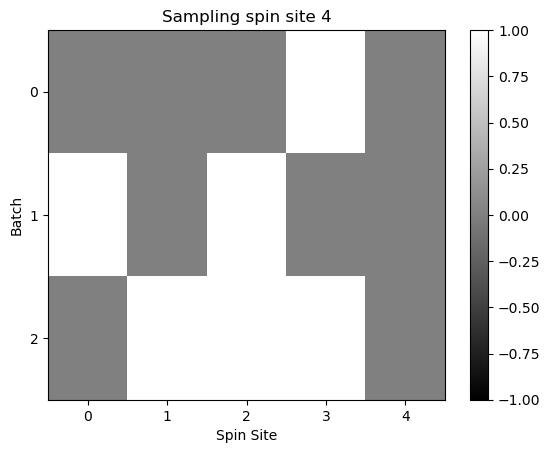

In [3]:
# La fonction ci dessous peut être ajoutée à la classe VAN pour simplifier le code 
# sans le plotting

mymodel = VAN(spin_size, torch.sigmoid)
spins =  - torch.ones((batch_size, spin_size))
for spin_site in range(spin_size):
    params_Bernoulli = mymodel(spins)
    spins_at_site = Bernoulli(params_Bernoulli[:, spin_site]).sample()
    spins[:, spin_site] = spins_at_site

    plt.figure()
    plt.title('Sampling spin site ' + str(spin_site))
    plt.imshow(spins, vmin=-1, vmax=1, cmap='gray', aspect='auto')
    plt.xlabel('Spin Site')
    plt.ylabel('Batch')
    plt.yticks(np.arange(0, batch_size, 1))
    plt.colorbar()


## 2. Trying training

In [4]:
def log_prob_target(spins):
    ''''
    Compute the log probability of the target distribution
     spin confirgurations mostly up more likely (* 0.8) than mostly down (* 0.2)
    '''
    log_probs = torch.ones(spins.shape[0]) * np.log(0.2)
    log_probs[spins.mean(-1) > 0.5] = np.log(0.8)
    return log_probs - np.log(2 ** (spin_size -1)) 

In [5]:
spin_size = 15
mymodel = VAN(spin_size, torch.sigmoid)

losses = train(mymodel, log_prob_target,  n_iter=500, lr=1e-3, batch_size=10000)

Epoch 0: -2.8991699707603402e-08
Epoch 50: -0.025367271155118942
Epoch 100: -0.018473781645298004
Epoch 150: -0.014597355388104916
Epoch 200: -0.016793787479400635
Epoch 250: -0.01717948727309704
Epoch 300: -0.017933838069438934
Epoch 350: -0.018179243430495262
Epoch 400: -0.017621533945202827
Epoch 450: -0.019421963021159172


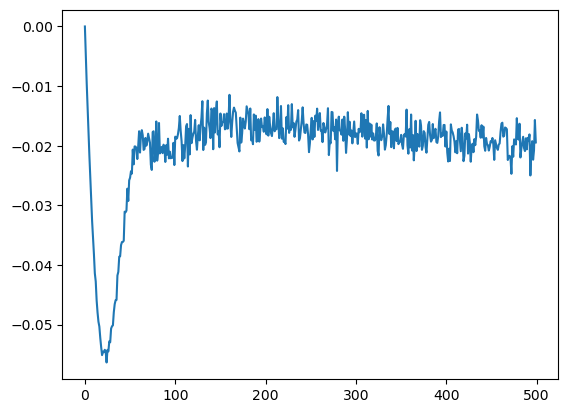

In [6]:
plt.plot(losses)

(array([3309.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6691.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

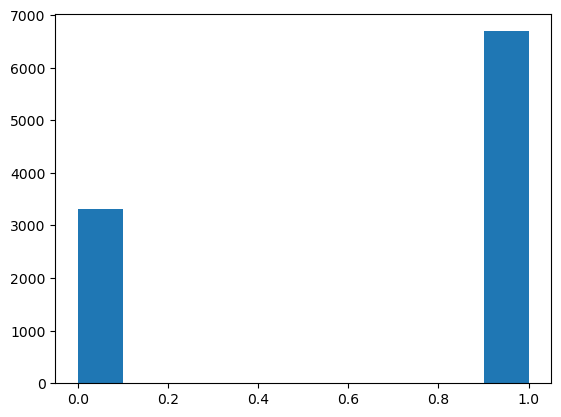

In [7]:
samples = mymodel.sample(10000)

plt.hist((samples.mean(-1) > 0.5) * 1)

## 3. 2D Ising model on a LxL lattice with periodic boundary conditions

Here you have a code of someone who simulated with Monte Carlo the Ising model and followed the mean value of the spin: https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid14.ipynb

There is a phase transition: for low temperatures, the distribution of the spins is bimodal, spins are either mostly up or mostly down. 
For high temperatures, the spins are less and less correlated and the mean value of the spins is close to 0.

Can you reproduce the behavior of the mean value of the spins? m(T)

In [8]:
#https://github.com/wdphy16/stat-mech-van/blob/master/src_ising/ising.py
# 2D classical Ising model

def energy(sample):
    term = sample[:, :, 1:, :] * sample[:, :, :-1, :]
    term = term.sum(dim=(1, 2, 3))
    output = term
    term = sample[:, :, :, 1:] * sample[:, :, :, :-1]
    term = term.sum(dim=(1, 2, 3))
    output += term

    # boundary == 'periodic':
    term = sample[:, :, 0, :] * sample[:, :, -1, :]
    term = term.sum(dim=(1, 2))
\
    output += term
    term = sample[:, :, :, 0] * sample[:, :, :, -1]
    term = term.sum(dim=(1, 2))
    output += term

    return - output


SyntaxError: invalid syntax (2450598714.py, line 1)